In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

Two sets of DES colours.

The second is the [DES Filter Color Scheme](https://cdcvs.fnal.gov/redmine/projects/des-sci-release/wiki/DES_Filter_Color_Scheme)

In [2]:
des_colors = ['#601A4A', '#EE442F','#63ACBE']
des_band_colors = ['#56b4e9', '#008060','#ff4000', '#850000', '#6600cc']

Define some segmented colormaps, first the ones using all of the available colors:

In [3]:
des_cmap = LinearSegmentedColormap.from_list('mycmap', list(zip(np.linspace(0,1,3), des_colors)))
des_band_cmap = LinearSegmentedColormap.from_list('mycmap', list(zip(np.linspace(0,1,5), des_band_colors)))

Then single colour maps for each band:

In [4]:
des_uband_cmap = LinearSegmentedColormap.from_list('mycmap', list(zip(np.linspace(0,1,2), ['#ffffff', des_band_colors[0]])))
des_gband_cmap = LinearSegmentedColormap.from_list('mycmap', list(zip(np.linspace(0,1,2), ['#ffffff', des_band_colors[1]])))
des_rband_cmap = LinearSegmentedColormap.from_list('mycmap', list(zip(np.linspace(0,1,2), ['#ffffff', des_band_colors[2]])))
des_iband_cmap = LinearSegmentedColormap.from_list('mycmap', list(zip(np.linspace(0,1,2), ['#ffffff', des_band_colors[3]])))
des_zband_cmap = LinearSegmentedColormap.from_list('mycmap', list(zip(np.linspace(0,1,2), ['#ffffff', des_band_colors[4]])))

...and finally some colour maps between two adjacent bands:

In [5]:
des_ugband_cmap = LinearSegmentedColormap.from_list('mycmap', list(zip(np.linspace(0,1,2), [des_band_colors[1], des_band_colors[0]])))
des_grband_cmap = LinearSegmentedColormap.from_list('mycmap', list(zip(np.linspace(0,1,2), [des_band_colors[2], des_band_colors[1]])))
des_riband_cmap = LinearSegmentedColormap.from_list('mycmap', list(zip(np.linspace(0,1,2), [des_band_colors[3], des_band_colors[2]])))
des_izband_cmap = LinearSegmentedColormap.from_list('mycmap', list(zip(np.linspace(0,1,2), [des_band_colors[4], des_band_colors[3]])))

This function (ripped from [here](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)) allows us to check the perceptual uniformity of the colormaps. Broadly, it is nice if they form straight lines.

In [6]:
from matplotlib import cm
from colorspacious import cspace_converter
def check_cmap(mycmap):
    x = np.linspace(0.0, 1.0, 100)
    rgb = cm.get_cmap(mycmap)(x)[np.newaxis, :, :3]
    lab = cspace_converter("sRGB1", "CAM02-UCS")(rgb)
    y_ = lab[0, ::-1, 0]
    c_ = x[::-1]
    dc = 1.4
    plt.figure()
    plt.scatter(x + dc, y_, c=c_, cmap=mycmap, s=300, linewidths=0.0)
    plt.ylim([0,100])
    plt.xticks([],[])
    plt.ylabel('Lightness')

The single band ones all look okay:

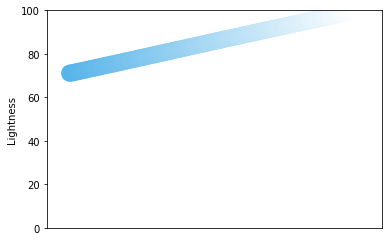

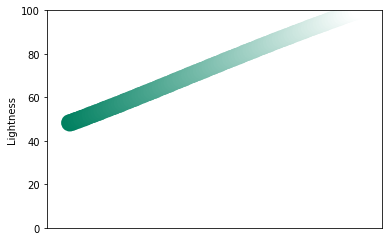

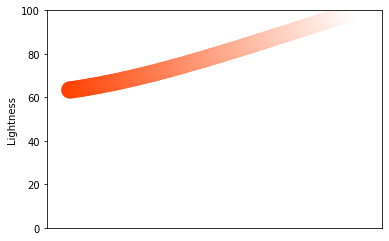

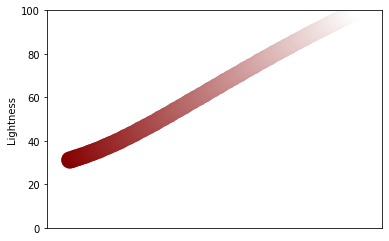

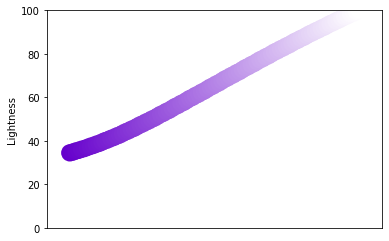

In [7]:
check_cmap(des_uband_cmap)
check_cmap(des_gband_cmap)
check_cmap(des_rband_cmap)
check_cmap(des_iband_cmap)
check_cmap(des_zband_cmap)

The adjacent ones are mixed, ug being the best:

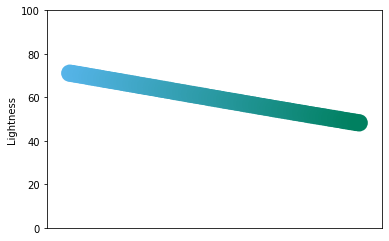

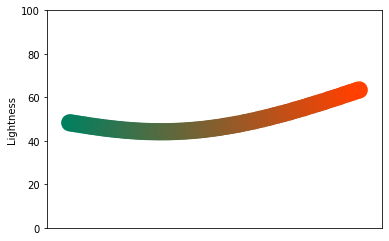

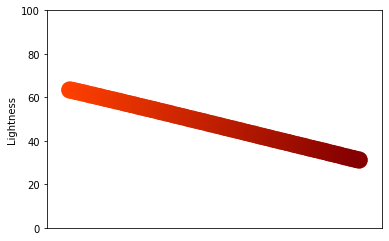

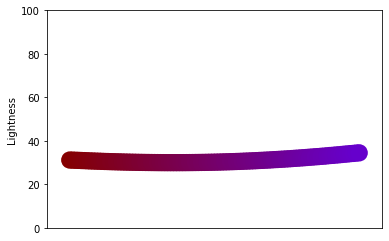

In [8]:
check_cmap(des_ugband_cmap)
check_cmap(des_grband_cmap)
check_cmap(des_riband_cmap)
check_cmap(des_izband_cmap)

The all-colour ones are a little all over the place:

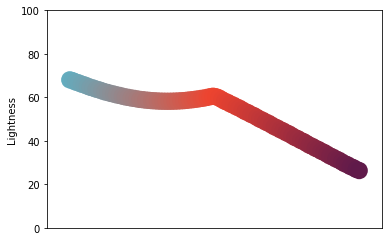

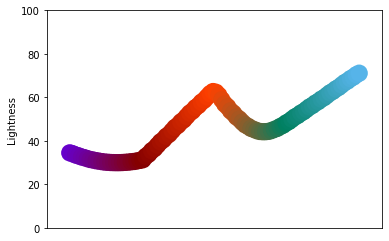

In [9]:
check_cmap(des_cmap)
check_cmap(des_band_cmap)